## **1. GBM**

* ÏÜêÍ∏ÄÏî® Ïà´Ïûê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§
* ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÏãúÌÇ® ÌõÑ Ïã§ÏäµÏùÑ ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time, warnings
warnings.filterwarnings('ignore')

digits = load_digits()
X = digits.data
y = digits.target

df_digits = pd.DataFrame(X, columns=[f'pix_{i}' for i in range(X.shape[1])])
df_digits['target'] = y
df_digits.head()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
print(X_train.shape, X_test.shape)

(1257, 64) (540, 64)


### 1-1. GBM ÏàòÌñâÏãúÍ∞Ñ Ï∏°Ï†ï


*   GradientBoostingClassifierÎ°ú ÏòàÏ∏° / Î∂ÑÎ•ò
*   GBM Ï†ïÌôïÎèÑ & ÌïôÏäµ ÏãúÍ∞Ñ Ï∂úÎ†•

*   ÏïÑÎûò ÏÖÄÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî



In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM Ï†ïÌôïÎèÑ: {0:.4f}'.format(gb_accuracy))
print("GBM ÏàòÌñâ ÏãúÍ∞Ñ: {0:.1f} Ï¥à ".format(time.time() - start_time))

GBM Ï†ïÌôïÎèÑ: 0.9630
GBM ÏàòÌñâ ÏãúÍ∞Ñ: 7.8 Ï¥à 


### 1-2. ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

* ÏïÑÎûò ÏÖÄÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî

In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=3, n_jobs=-1, verbose=1)
grid_cv.fit(X_train, y_train)
print('ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞:\n', grid_cv.best_params_)
print('ÏµúÍ≥† ÏòàÏ∏° Ï†ïÌôïÎèÑ: {0:.4f}'.format(grid_cv.best_score_))

gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("GBM Ï†ïÌôïÎèÑ: {0:.4f}".format(gb_accuracy))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
ÏµúÍ≥† ÏòàÏ∏° Ï†ïÌôïÎèÑ: 0.9578
GBM Ï†ïÌôïÎèÑ: 0.9648


### 1-3. OX ÌÄ¥Ï¶à

* Í¥ÑÌò∏ ÏïàÏóê O ÎòêÎäî XÎ•º ÌëúÍ∏∞ÌïòÍ≥†

* XÏùº Í≤ΩÏö∞ ÏïÑÎû´Ï§ÑÏóê Í∞ÑÎã®Ìïú Í∑ºÍ±∞Î•º Ï†ÅÏñ¥Ï£ºÏÑ∏Ïöî (OÎäî Í≥µÎûÄÏúºÎ°ú)

(X) GBMÏùÄ Ìä∏Î¶¨Îì§ÏùÑ ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú Î≥ëÎ†¨ ÌïôÏäµÌïòÎØÄÎ°ú ÎåÄÏö©ÎüâÏóêÏÑú Îß§Ïö∞ Îπ†Î•¥Îã§.
- Í∑ºÍ±∞:GBMÏùÄ Ïù¥Ï†Ñ Ìä∏Î¶¨Ïùò Ïò§Ï∞®Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú Î≥¥Ï†ïÌïòÎ©∞ ÌïôÏäµÌïòÎØÄÎ°ú Ìä∏Î¶¨ Í∞Ñ Î≥ëÎ†¨ ÌïôÏäµÏù¥ Î∂àÍ∞ÄÎä•

(O) ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îπ†Î•∏ ÏàòÌñâ ÏãúÍ∞ÑÏùÑ Î≥¥Ïû•ÌïòÎäî Ìé∏Ïù¥Îùº, ÏòàÏ∏° Í≤∞Í≥º ÎèÑÏ∂úÏù¥ ÏâΩÎã§.
- Í∑ºÍ±∞:

(O) GBMÏùÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÌôîÏóê ÎØºÍ∞êÌïòÏó¨ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÎÖ∏Î†•Ïù¥ Îçî ÌïÑÏöîÌïòÎã§.
- Í∑ºÍ±∞:

(X) ÏÇ¨Ïù¥ÌÇ∑Îü∞ GradientBoostingClassifierÎäî Î©ÄÌã∞ CPU ÏΩîÏñ¥Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Î≥ëÎ†¨ ÌïôÏäµÏùÑ ÏàòÌñâÌïúÎã§.
- Í∑ºÍ±∞:ÏïΩÌïú ÌïôÏäµÍ∏∞Ïùò ÏàúÏ∞®Ï†ÅÏù∏ ÏóêÏ∏° Ïò§Î•ò Î≥¥Ï†ïÏùÑ ÌÜµÌï¥ ÌïôÏäµÏùÑ ÏàòÌñâÌïòÎØÄÎ°ú Î©ÄÌã∞ CPU ÏΩîÏñ¥ ÏãúÏä§ÌÖú ÏÇ¨Ïö©ÌïòÎçîÎùºÎèÑ Î≥ëÎ†¨ Ï≤òÎ¶¨ÏßÄÏõê X


## **2. XGBoost**

* ÏúÑÏä§ÏΩòÏã† Ïú†Î∞©Ïïî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§
* ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÏãúÌÇ® ÌõÑ Ïã§ÏäµÏùÑ ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî

In [10]:
import xgboost as xgb
from xgboost import plot_importance
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [11]:
# ÌÉÄÍπÉ Î†àÏù¥Î∏î Í∞í Î∂ÑÌè¨ ÌôïÏù∏
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


### 2-1. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÌï†


* ÏïÑÎûò ÏÖÄÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî
* random_state=156


In [12]:
# cancer_dfÏóêÏÑú featureÏö© DataFrameÍ≥º LabelÏö© Series Í∞ùÏ≤¥ Ï∂îÏ∂ú
# Îß® ÎßàÏßÄÎßâ ÏπºÎüºÏù¥ LabelÏûÑ. FeatureÏö© DataFrameÏùÄ cancer_dfÏùò Ï≤´Î≤àÏß∏ ÏπºÎüºÏóêÏÑú Îß® ÎßàÏßÄÎßâ ÎëêÎ≤àÏß∏ ÏπºÎüºÍπåÏßÄÎ•º :-1 Ïä¨ÎùºÏù¥Ïã±ÏúºÎ°ú Ï∂îÏ∂ú
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë 70%Îäî ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞, 30%Îäî ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.3,random_state=156)

# ÏúÑÏóêÏÑú ÎßåÎì† X_train, y_trainÏùÑ Îã§Ïãú Ï™ºÍ∞úÏÑú 50%Îäî ÌïôÏäµÍ≥º 50%Îäî Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.5,random_state=156)

print(X_train.shape,X_test.shape)
print(X_tr.shape,X_val.shape)

(398, 30) (171, 30)
(199, 30) (199, 30)


* ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÏãúÌÇ® ÌõÑ Ïã§ÏäµÏùÑ Ïù¥Ïñ¥ÏÑú ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî



In [13]:
# ÎßåÏïΩ Íµ¨Î≤ÑÏ†Ñ XGBoostÏóêÏÑú DataFrameÏúºÎ°ú DMatrix ÏÉùÏÑ±Ïù¥ Ïïà Îê† Í≤ΩÏö∞ X_train.valuesÎ°ú ÎÑòÌååÏù¥ Î≥ÄÌôò
# ÌïôÏäµ, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏Ïö© DMatrix ÏÉùÏÑ±
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

### 2-2. ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

* Îã§Ïùå Ï°∞Í±¥Ïóê ÎßûÍ≤å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî

  * Ìä∏Î¶¨Ïùò ÏµúÎåÄ ÍπäÏù¥: 4

  * ÌïôÏäµÎ•†(eta): 0.1

  * Ïù¥ÏßÑ Î∂ÑÎ•ò

  * Ïò§Î•ò Ìï®ÏàòÏùò ÌèâÍ∞Ä ÏÑ±Îä• ÏßÄÌëúÎäî logloss

  * Î∂ÄÏä§ÌåÖ Î∞òÎ≥µ ÌöüÏàò: 500Ìöå

In [15]:
params = {
'max_depth': 4, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss'
}
num_rounds = 500

### 2-3. Ï°∞Í∏∞ Ï¢ÖÎ£å

* ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÏãúÌÇ® ÌõÑ ÏßàÎ¨∏Ïóê ÎãµÌïòÏÑ∏Ïöî

In [16]:
eval_list = [(dtr, 'train'), (dval, 'eval')]

# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ÏôÄ early stopping ÌååÎùºÎØ∏ÌÑ∞Î•º train() Ìï®ÏàòÏùò ÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÎã¨
xgb_model = xgb.train(
    params=params, dtrain=dtr,
    num_boost_round=num_rounds, evals=eval_list,
    early_stopping_rounds=30
)

[0]	train-logloss:0.59881	eval-logloss:0.59461
[1]	train-logloss:0.53304	eval-logloss:0.53950
[2]	train-logloss:0.47736	eval-logloss:0.49440
[3]	train-logloss:0.43045	eval-logloss:0.45641
[4]	train-logloss:0.38705	eval-logloss:0.42061
[5]	train-logloss:0.34986	eval-logloss:0.39003
[6]	train-logloss:0.31906	eval-logloss:0.36742
[7]	train-logloss:0.28999	eval-logloss:0.34479
[8]	train-logloss:0.26471	eval-logloss:0.32457
[9]	train-logloss:0.24204	eval-logloss:0.30457
[10]	train-logloss:0.22285	eval-logloss:0.28760
[11]	train-logloss:0.20463	eval-logloss:0.27492
[12]	train-logloss:0.18937	eval-logloss:0.26321
[13]	train-logloss:0.17578	eval-logloss:0.25107
[14]	train-logloss:0.16270	eval-logloss:0.24360
[15]	train-logloss:0.15007	eval-logloss:0.23200
[16]	train-logloss:0.13961	eval-logloss:0.22630
[17]	train-logloss:0.12923	eval-logloss:0.21692
[18]	train-logloss:0.12080	eval-logloss:0.21310
[19]	train-logloss:0.11247	eval-logloss:0.20788
[20]	train-logloss:0.10557	eval-logloss:0.20366
[2

* Ï°∞Í∏∞ Ï¢ÖÎ£åÏùò Í∞úÎÖêÏùÑ Ìïú Î¨∏Ïû•ÏúºÎ°ú ÏÑ§Î™ÖÌïòÍ≥†, ÏúÑ Í≤∞Í≥ºÏóêÏÑú Í≤ÄÏ¶ù ÌèâÍ∞Ä ÏßÄÌëúÏùò ÏµúÏ†Å ÏãúÏ†êÏù¥ num_roundsÎ≥¥Îã§ ÏûëÍ≤å Í≤∞Ï†ïÎê† Ïàò ÏûàÎäî Ïù¥Ïú†Î•º Í∞ÑÎã®Ìûà ÏÑúÏà†ÌïòÏÑ∏Ïöî

Ï†ïÎãµ:
> Îçî Ïù¥ÏÉÅ ÏßÄÌëú Í∞úÏÑ†Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞ num_roundsÎ•º Î™®Îëê Ï±ÑÏö∞ÏßÄ ÏïäÍ≥† Ï§ëÍ∞ÑÏóê Î∞òÎ≥µ Îπ†Ï†∏ÎÇòÏò§ÎèÑÎ°ù ÌïòÎäî Í≤É.

> early_stopping_roundsÎ°ú ÏÑ§Ï†ïÌïú 30Ìöå ÎèôÏïà ÏßÄÌëú Í∞úÏÑ†Ïù¥ ÏóÜÏóàÍ∏∞ ÎïåÎ¨∏Ïóê num_rounds Ï†ÑÏóê ÏµúÏ†Å ÏßÄÌëúÍ∞Ä Í≤∞Ï†ïÎêòÏóàÎã§.

* ÎÇ®ÏùÄ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏó¨ Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî

In [17]:
dtest = xgb.DMatrix(data=X_test, label=y_test)
pred_probs = xgb_model.predict(dtest)
print('predict() ÏàòÌñâ Í≤∞Í¥èÍ∞íÏùÑ 10Í∞úÎßå ÌëúÏãú, ÏòàÏ∏° ÌôïÎ•† Í∞íÏúºÎ°ú ÌëúÏãúÎê®')
print(np.round(pred_probs[:10], 3))

# ÏòàÏ∏° ÌôïÎ•†Ïù¥ 0.5Î≥¥Îã§ ÌÅ¨Î©¥ 1, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ 0ÏúºÎ°ú ÏòàÏ∏°Í∞í Í≤∞Ï†ïÌïòÏó¨ List Í∞ùÏ≤¥Ïù∏ predsÏóê Ï†ÄÏû•
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('ÏòàÏ∏°Í∞í 10Í∞úÎßå ÌëúÏãú:', preds[:10])

predict() ÏàòÌñâ Í≤∞Í¥èÍ∞íÏùÑ 10Í∞úÎßå ÌëúÏãú, ÏòàÏ∏° ÌôïÎ•† Í∞íÏúºÎ°ú ÌëúÏãúÎê®
[0.827 0.005 0.053 0.166 0.973 0.998 0.998 0.995 0.996 0.003]
ÏòàÏ∏°Í∞í 10Í∞úÎßå ÌëúÏãú: [1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


### 2-4. ÏãúÍ∞ÅÌôî
* xgboost ÎÇ¥Ïû• ÏãúÍ∞ÅÌôî Ìï®Ïàò ÏÇ¨Ïö©
* ÏïÑÎûò ÏÖÄÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

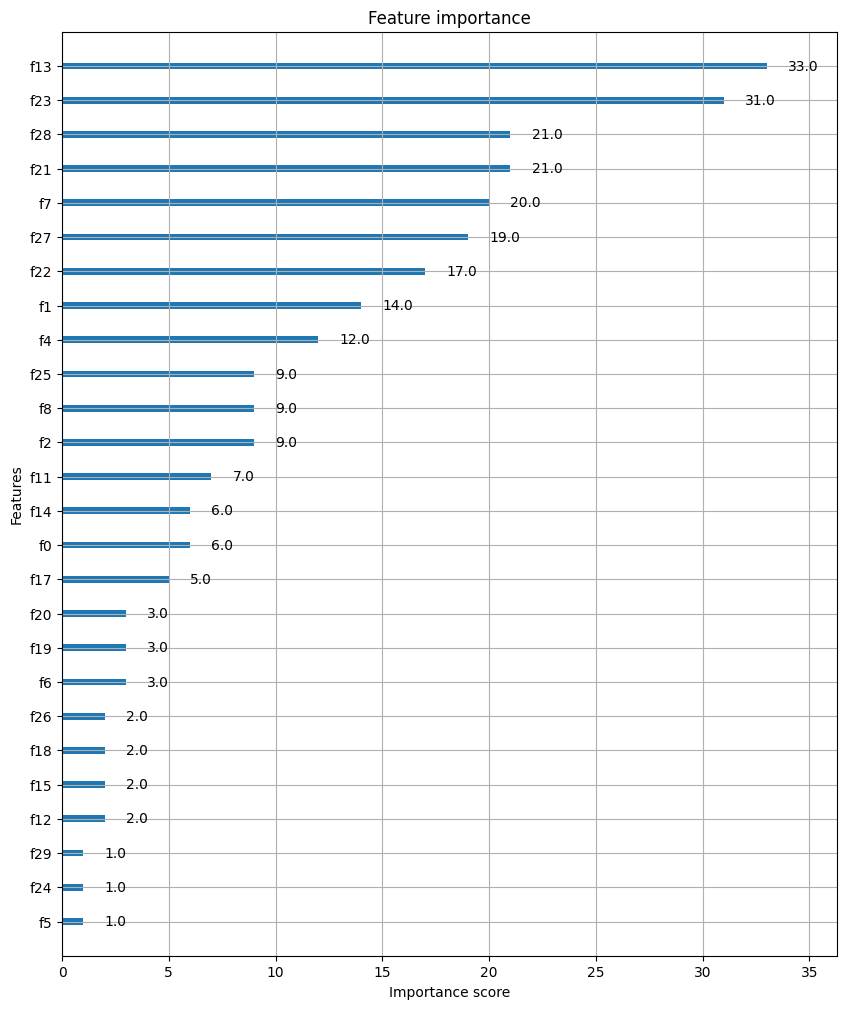

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

## **3. LightGBM**

#### Ìï¥Îãπ ÌååÌä∏ÏóêÏÑúÎäî sklearn Ìå®ÌÇ§ÏßÄÏùò wine Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Ïù¥Ïö©Ìï©ÎãàÎã§. `# ÎãµÏïà` ÏúÑÏπòÏóê ÎãµÏùÑ Ï±ÑÏõåÎÑ£Ïñ¥ Ï£ºÏÑ∏Ïöî.

In [20]:
# Ïã§ÏäµÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù¥ÎØÄÎ°ú Ïã§ÌñâÌï¥ Ï£ºÏÑ∏Ïöî.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from lightgbm import LGBMClassifier, plot_importance

In [21]:
# Ïã§ÌñâÌï¥ Ï£ºÏÑ∏Ïöî.

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
dataset = load_wine()

wine_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
wine_df['target'] = dataset.target

# ÏûÖÎ†•(X), Î†àÏù¥Î∏î(y) Î∂ÑÎ¶¨
X_features = wine_df.iloc[:, :-1]
y_label = wine_df.iloc[:, -1]

#### Î¨∏Ï†ú 1. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ÌïòÍ∏∞
1-1. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò 80%Î•º ÌïôÏäµÏö©ÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî. <br>
1-2. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò 10%Î•º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú Îã§Ïãú Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.

In [22]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ 80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Îã§Ïãú 90% ÌïôÏäµ, 10% Í≤ÄÏ¶ù
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=156)

#### Î¨∏Ï†ú 2. LGBM Î∂ÑÎ•òÍ∏∞ ÏÉùÏÑ±ÌïòÍ∏∞
2-1. wine Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î∂ÑÎ•òÎ•º ÏúÑÌï¥ Ìä∏Î¶¨ Í∞úÏàò 400, ÌïôÏäµÎ•† 0.05Î°ú LightGBM Î∂ÑÎ•òÍ∏∞Î•º ÏÉùÏÑ±ÌïòÏÑ∏Ïöî. <br>
2-2. X_val, y_valÏóêÏÑú **60Î≤à** ÎèôÏïà ÏÑ±Îä• Í∞úÏÑ†Ïù¥ ÏóÜÏúºÎ©¥ ÌïôÏäµÏùÑ Î©àÏ∂îÎèÑÎ°ù ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.

In [31]:
# 2-1.
lgbm_wrapper = LGBMClassifier(n_estimators=400,learning_rate=0.05, early_stopping_rounds = 60)

# 2-2.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(
    X_tr, y_tr,
    eval_metric="multi_logloss",
    eval_set=evals,
)

[LightGBM] [Warning] early_stopping_round is set=60, early_stopping_rounds=60 will be ignored. Current value: early_stopping_round=60
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 13
[LightGBM] [Warning] early_stopping_round is set=60, early_stopping_rounds=60 will be ignored. Current value: early_stopping_round=60
[LightGBM] [Info] Start training from score -1.082987
[LightGBM] [Info] Start training from score -0.952367
[LightGBM] [Info] Start training from score -1.288839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 60 round

LGBMClassifier(early_stopping_rounds=60, learning_rate=0.05, n_estimators=400)

#### Î¨∏Ï†ú 3. ÏòàÏ∏°ÌïòÍ∏∞
3-1. ÌïôÏäµÎêú LightGBM Î∂ÑÎ•òÍ∏∞Î•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî. <br>
3-2. predict() Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§ ÏòàÏ∏°Í∞í predsÏùÑ Íµ¨ÌïòÏÑ∏Ïöî.<br>

In [32]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)

# Ï∂úÎ†• ÌôïÏù∏
print("ÏòàÏ∏° ÌÅ¥ÎûòÏä§(Ïïû 10Í∞ú):", preds[:10])
print("ÏòàÏ∏° ÌôïÎ•† ÌñâÎ†¨ shape:", pred_proba.shape)
print("ÏòàÏ∏° ÌôïÎ•† (Ïïû 5Í∞ú ÏÉòÌîå):\n", np.round(pred_proba[:5], 3))

ÏòàÏ∏° ÌÅ¥ÎûòÏä§(Ïïû 10Í∞ú): [1 2 0 1 1 2 1 0 1 1]
ÏòàÏ∏° ÌôïÎ•† ÌñâÎ†¨ shape: (36, 3)
ÏòàÏ∏° ÌôïÎ•† (Ïïû 5Í∞ú ÏÉòÌîå):
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


#### Î¨∏Ï†ú 4. ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
ÎÇ¥Ïû• APIÎ•º ÌôúÏö©Ìï¥ Í∞Å ÌîºÏ≤òÏùò Ï§ëÏöîÎèÑÎ•º ÏãúÍ∞ÅÌôîÌï¥Î≥¥ÏÑ∏Ïöî.

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

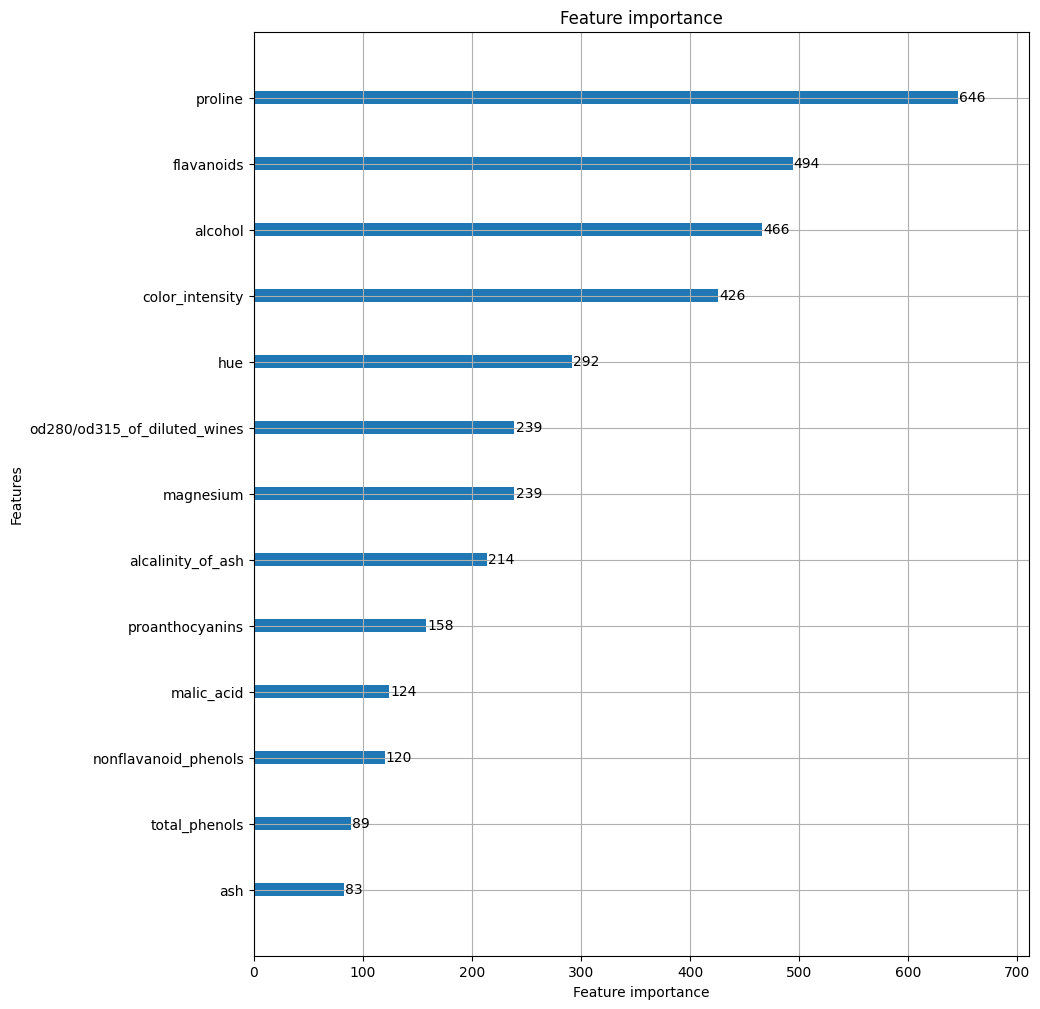

In [33]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## **4. Î≤†Ïù¥ÏßÄÏïà ÏµúÏ†ÅÌôî Í∏∞Î∞òÏùò HyperOptÎ•º Ïù¥Ïö©Ìïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù**

#### Ìï¥Îãπ ÌååÌä∏ÏóêÏÑúÎäî diabetes Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Ïù¥Ïö©Ìï©ÎãàÎã§. `# ÎãµÏïà` ÏúÑÏπòÏóê ÎãµÏùÑ Ï±ÑÏõåÎÑ£Ïñ¥ Ï£ºÏÑ∏Ïöî.

In [35]:
# Ïã§ÌñâÌï¥ Ï£ºÏÑ∏Ïöî.

import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
np.random.seed(156)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú: Ïã§Ïäµ ÌôòÍ≤ΩÏóê ÎßûÏ∂îÏñ¥ Î≥ÄÍ≤ΩÌï¥ Ï£ºÏÑ∏Ïöî.
from google.colab import drive
drive.mount('/content/gdrive')
directory_path = '/content/gdrive/My Drive/Colab Notebooks/Euron/Îç∞Ïù¥ÌÑ∞/'
diabetes_df = pd.read_csv(directory_path+"diabetes.csv")

X_features = diabetes_df.iloc[:, :-1]
y_label    = diabetes_df.iloc[:, -1]

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë 80%Îäî ÌïôÏäµÏö©, 20%Îäî ÌÖåÏä§Ìä∏Ïö©
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_label, test_size=0.2, stratify=y_label, random_state=156)

# ÏïûÏóêÏÑú Ï∂îÏ∂úÌïú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ (9:1)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=156)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Î¨∏Ï†ú 1. Í≤ÄÏÉâÍ≥µÍ∞Ñ Ï†ïÏùò
ÏïÑÎûòÏôÄ Í∞ôÏù¥ max_depthÏôÄ min_child_weight, learning_rate, colsample_bytreeÎ•º ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í≤ÄÏÉâ Í≥µÍ∞ÑÏúºÎ°ú Ï†ïÏùòÌïòÎ†§Í≥† Ìï©ÎãàÎã§. ÎπàÏπ∏ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî. <br>
- max_depthÎäî 3~10 Î≤îÏúÑÏóêÏÑú 1 Í∞ÑÍ≤©
- min_child_weightÎäî 1~6 Î≤îÏúÑÏóêÏÑú 1 Í∞ÑÍ≤©

In [37]:
from hyperopt import hp
xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'learning_rate':    hp.uniform('learning_rate', 0.01, 0.3),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
}

#### Î¨∏Ï†ú 2. Î™©Ï†ÅÌï®Ïàò ÏûëÏÑ±
ÏÑúÏà†Ìòï Î¨∏Ï†úÎäî ÎßàÌÅ¨Îã§Ïö¥ ÏÖÄÏùÑ Ìï¥Ï†úÌïòÍ≥† ÎãµÏïàÏùÑ ÏûÖÎ†•Ìï¥ Ï£ºÏÑ∏Ïöî! <br>
2-1. HyperOptÏùò fmin Ìï®ÏàòÎäî trials Í∞ùÏ≤¥Î•º ÌÜµÌï¥ Í∞Å Î∞òÎ≥µÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í∞íÍ≥º ÏÜêÏã§ Ìï®Ïàò Í≤∞Í≥ºÍ∞íÏùÑ Í∏∞Î°ùÌï©ÎãàÎã§. Ïù¥ Í∏∞Î°ùÏù¥ Ï†ÄÏû•ÎêòÎäî Trials Í∞ùÏ≤¥Ïùò Îëê Í∞ÄÏßÄ Ï£ºÏöî ÏÜçÏÑ±ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî? <br>
2-2. ÏïÑÎûòÎäî Î™©Ï†ÅÌï®Ïàò objective_funcÎ•º Ï†ïÏùòÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§. ÎπàÏπ∏ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî. (ÌèâÍ∞Ä ÏßÄÌëúÎäî `Ï†ïÌôïÎèÑ`ÏûÖÎãàÎã§.) <br>
2-3. ÎãµÏïà1, ÎãµÏïà2Ïóê Ïôú Í∑∏ ÎãµÏùÑ ÏûÖÎ†•ÌñàÎäîÏßÄ Ïù¥Ïú†Î•º ÏÑúÏà†ÌïòÏÑ∏Ïöî. <br>
2-4. ÎãµÏïà5Ïóê Ïôú Í∑∏ ÎãµÏùÑ ÏûÖÎ†•ÌñàÎäîÏßÄ Ïù¥Ïú†Î•º ÏÑúÏà†ÌïòÏÑ∏Ïöî.

üìù **2-1 ÎãµÏïà:**
> results: Ìï®Ïàò Î∞òÎ≥µ ÏàòÌñâ ÏãúÎßàÎã§ Î∞òÌôòÎêòÎäî Î∞òÌôòÍ∞í

> vals: Ìï®Ïàò Î∞òÎ≥µ ÏàòÌñâ ÏãúÎßàÎã§ ÏûÖÎ†•ÎêòÎäî ÏûÖÎ†• Î≥ÄÏà´Í∞í

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK

## 2-2 ÎãµÏïà Ï±ÑÏö∞Í∏∞:
def objective_func(search_space):
    clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='mlogloss',
        random_state=156
    )
    accuracy = cross_val_score(clf, X_tr, y_tr, scoring='accuracy', cv=3).mean()
    return {'loss': 1-accuracy, 'status': STATUS_OK}

üìù **2-3 ÎãµÏïà:**
> hp.quniformÏùÄ floatÌòï Í∞íÏùÑ Î∞òÌôò -> int()Î°ú Ï†ïÏàòÌòï Î≥ÄÌôòÌï¥Ï§òÏïº Ìï®.

üìù **2-4 ÎãµÏïà:**
> HyperOptÎäî ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÌÉêÏÉâÌïòÎØÄÎ°ú, Ï†ïÌôïÎèÑÎ•º ÏµúÎåÄÌôîÌïòÍ∏∞ ÏúÑÌï¥ (1-accuracy)Î•º ÏÜêÏã§Î°ú ÏÇ¨Ïö©Ìï¥Ïïº Ìï®

#### Î¨∏Ï†ú 3. ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•ÌïòÍ∏∞
fmin()ÏùÑ Ïù¥Ïö©Ìï¥ ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÎèÑÏ∂úÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§. ÎπàÏπ∏ÏùÑ Ï±ÑÏõå Ï£ºÏÑ∏Ïöî.

In [41]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:13<00:00,  3.63trial/s, best loss: 0.246376811594203]
best: {'colsample_bytree': np.float64(0.6581447880498574), 'learning_rate': np.float64(0.019898058431505047), 'max_depth': np.float64(8.0), 'min_child_weight': np.float64(2.0)}


In [42]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.65814, learning_rate:0.0199, max_depth:8, min_child_weight:2


## **5. Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ (Î°úÍ∑∏ Î≥ÄÌôò)**

ÏÇ¨Ïù¥ÌÇ∑Îü∞ Pima Indians Diabetes Dataset ÏÇ¨Ïö©

In [39]:
# Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Pima Indians Diabetes Dataset Î∂àÎü¨Ïò§Í∏∞.

In [40]:
# Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

import pandas as pd
from sklearn.datasets import fetch_openml

diabetes = fetch_openml(name="diabetes", version=1, as_frame=True, parser="auto")

# 'df'Ïóê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
df = diabetes.frame

# Î†àÏù¥Î∏îÍ∞í : class
# class=0 -> tested_negative), class=1 -> tested_positive)
df["class"] = df["class"].map({"tested_negative": 0, "tested_positive": 1})
df.head()

preg  plas  pres  skin  insu  mass   pedi  age class
0     6   148    72    35     0  33.6  0.627   50     1
1     1    85    66    29     0  26.6  0.351   31     0
2     8   183    64     0     0  23.3  0.672   32     1
3     1    89    66    23    94  28.1  0.167   21     0
4     0   137    40    35   168  43.1  2.288   33     1

### 5-1. ÏôúÍ≥°Îêú Î∂ÑÌè¨ÎèÑÎ•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏Î≥ÄÌôòÌïòÏó¨ Í∞ÄÍ≥µÌïòÍ∏∞

'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [46]:
# dfÏùò Î≥µÏÇ¨ DataFrameÏùÑ Î∞òÌôò
df_copy = df.copy()

# ÎÑòÌååÏù¥Ïùò log1p( )Î•º Ïù¥Ïö©Ìï¥ plasÎ•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ plas_nÏóê Ï†ÄÏû•
plas_n = np.log1p(df_copy['plas'])

# plas_nÎ•º 'plas_scaled'Ïù¥ÎùºÎäî ÌîºÏ≤òÎ™ÖÏúºÎ°ú df_copyÏùò Îß® Ïïû ÏπºÎüºÏóê Ï∂îÍ∞ÄÌïòÍ≥†, ÏõêÎûò plasÏπºÎüºÏùÄ ÏÇ≠Ï†ú
df_copy.insert(0,'plas_scales',plas_n)
df_copy.drop(['plas'],axis=1,inplace=True)
print(df_copy)

     plas_scales  preg  pres  skin  insu  mass   pedi  age class
0       5.003946     6    72    35     0  33.6  0.627   50     1
1       4.454347     1    66    29     0  26.6  0.351   31     0
2       5.214936     8    64     0     0  23.3  0.672   32     1
3       4.499810     1    66    23    94  28.1  0.167   21     0
4       4.927254     0    40    35   168  43.1  2.288   33     1
..           ...   ...   ...   ...   ...   ...    ...  ...   ...
763     4.624973    10    76    48   180  32.9  0.171   63     0
764     4.812184     2    70    27     0  36.8  0.340   27     0
765     4.804021     5    72    23   112  26.2  0.245   30     0
766     4.844187     1    60     0     0  30.1  0.349   47     1
767     4.543295     1    70    31     0  30.4  0.315   23     0

[768 rows x 9 columns]


### 5-2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [50]:
# df_copyÎ•º ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ÏôÄ Î†àÏù¥Î∏î(ÌÉÄÍπÉ)Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàÑÍ∏∞ (DataFrameÏùò Îß® ÎßàÏßÄÎßâ ÏπºÎüºÏù¥ Î†àÏù¥Î∏î, ÎÇòÎ®∏ÏßÄÎäî ÌîºÏ≤òÎì§)
X_features = df_copy.iloc[:,:-1]
y_target = df_copy.iloc[:,-1]

# ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†ÌïòÎäî Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÌïòÍ∏∞(random_state=0ÏúºÎ°ú ÎûúÎç§ÏãúÎìú Í≥†Ï†ï. stratify=y_targetÏúºÎ°ú StratifiedÍ∏∞Î∞ò Î∂ÑÌï†)
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size=0.2,random_state=0,stratify=y_target)

### 5-3. Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ÌõÑ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏàòÌñâ
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [52]:
# plasÎ•º Î°úÍ∑∏Î≥ÄÌôòÌïú ÌõÑ Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÌïôÏäµ/ÏòàÏ∏°.(max_iter=1000)
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
# ÌïôÏäµ/ÏòàÏ∏° ÏàòÌñâ
lr_clf.fit(X_train,y_train)
preds=lr_clf.predict(X_test)

# ÏòàÏ∏° Ï†ïÌôïÎèÑ ÌôïÏù∏
print('ÏòàÏ∏° Ï†ïÌôïÎèÑ:', accuracy_score(y_test, preds))

ÏòàÏ∏° Ï†ïÌôïÎèÑ: 0.7727272727272727


## **6. Ïù¥ÏÉÅÏπò Ï†úÍ±∞**

### 6-1. Ïù¥ÏÉÅÏπòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ Î®ºÏ†Ä ÌîºÏ≤òÎ≥ÑÎ°ú ÏÉÅÍ¥ÄÎèÑ Íµ¨Ìïú Îí§ ÏãúÍ∞ÅÌôî
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

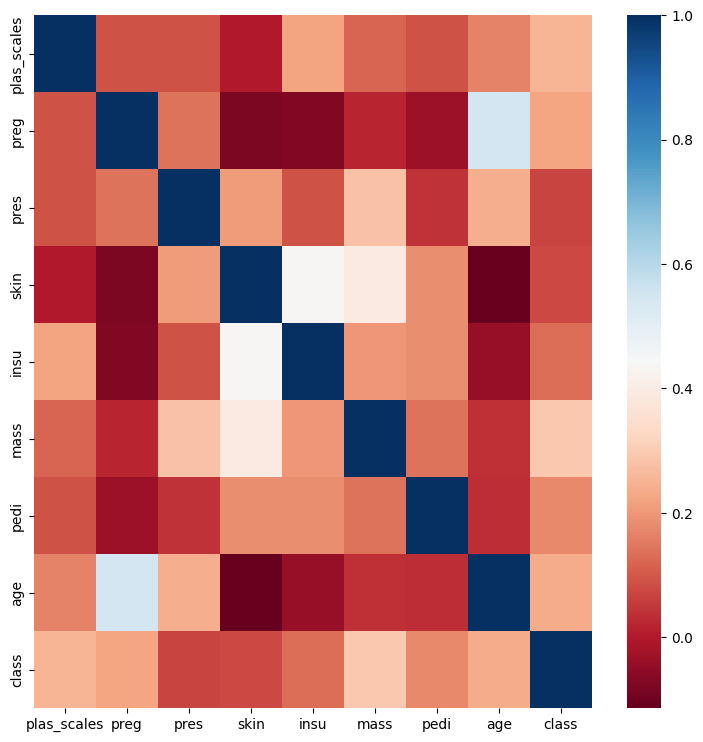

In [53]:
# corr()ÏùÑ Ïù¥Ïö©Ìï¥ Í∞Å ÌîºÏ≤òÎ≥ÑÎ°ú ÏÉÅÍ¥ÄÎèÑÎ•º Íµ¨Ìïú Îí§ ÏãúÎ≥∏Ïùò heatmapÏùÑ ÌÜµÌï¥ ÏãúÍ∞ÅÌôî( figsize=(9, 9), ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏ÎßµÏóêÏÑú cmap='RdBu'Î°ú ÏÑ§Ï†ï)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
corr=df_copy.corr()
sns.heatmap(corr,cmap='RdBu')
plt.show()

### 6-2. Ïù¥ÏÉÅÏπò Ï∞æÏïÑÏÑú Ï†úÍ±∞ÌïòÍ∏∞
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [54]:
# Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.
df_copy= df.copy()

In [61]:
# classÍ∞Ä 1(test_positive)Ïóê Ìï¥ÎãπÌïòÎäî column Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
positive = df[df['class']==1]['pres'] # Í≤∞Ï†ï Î†àÏù¥Î∏îÏù∏ Class ÌîºÏ≤òÏôÄ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÌîºÏ≤ò(ÏÉâÍπîÏù¥ Í∞ÄÏû• ÏßÑÌïú Îπ®Í∞ÑÏÉâ)Î•º ÏÑ†ÌÉù

# 1/4 Î∂ÑÏúÑÏôÄ 3/4 Î∂ÑÏúÑ ÏßÄÏ†êÏùÑ np.percentileÎ°ú Íµ¨Ìï®.
Q1 = np.percentile(positive.values, 25 )
Q3 = np.percentile(positive.values, 75 )

# IQRÏùÑ Íµ¨ÌïòÍ≥†, IQRÏóê 1.5Î•º Í≥±Ìï¥ ÏµúÎåìÍ∞íÍ≥º ÏµúÏÜüÍ∞í ÏßÄÏ†ê Íµ¨Ìï®.
iqr = Q3-Q1
lowest_val = Q1-iqr*1.5
highest_val = Q3+iqr*1.5

# ÏµúÎåìÍ∞íÎ≥¥Îã§ ÌÅ¨Í±∞ÎÇò, ÏµúÏÜüÍ∞íÎ≥¥Îã§ ÏûëÏùÄ Í∞íÏùÑ Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Î°ú ÏÑ§Ï†ïÌïòÍ≥† DataFrame index Î∞òÌôò.
outlier_index = positive[(positive<lowest_val)|(positive>highest_val)].index

# outlier_indexÏóê Ìï¥ÎãπÌïòÎäî Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
df_copy.drop(outlier_index, axis=0, inplace=True)

### 6-3. LightGBMÎ™®Îç∏ ÏàòÌñâ
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [62]:
# Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî

X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]
# train_test_split( )ÏúºÎ°ú ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†. stratify=y_targetÏúºÎ°ú Stratified Í∏∞Î∞ò Î∂ÑÌï†
X_train, X_test, y_train, y_test = \
train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

In [65]:
# LightGBMÎ™®Îç∏ ÌïôÏäµ/ÏòàÏ∏°
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, random_state=42, verbose=-1)
lgbm_clf.fit(X_train,y_train)
preds=lgbm_clf.predict(X_test)

# ÏòàÏ∏° Ï†ïÌôïÎèÑ ÌôïÏù∏
print('ÏòàÏ∏° Ï†ïÌôïÎèÑ:', accuracy_score(y_test, preds))

ÏòàÏ∏° Ï†ïÌôïÎèÑ: 0.7633928571428571


## **7. Í∏∞Î≥∏ Ïä§ÌÉúÌÇπ Î™®Îç∏**

### 7-1. Í∞úÎ≥Ñ Î™®Îç∏ ÌïôÏäµ/ÏòàÏ∏°
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [66]:
# ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
df_copy = df.copy()
X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]
X_train, X_test, y_train, y_test = \
train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

# Í∞úÎ≥Ñ ML Î™®Îç∏ ÏÉùÏÑ±
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier(random_state=0)
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=0)

# Ïä§ÌÉúÌÇπÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÌïôÏäµ, ÏòàÏ∏°Ìï† ÏµúÏ¢Ö Î™®Îç∏
lr_final = LogisticRegression()

# Í∞úÎ≥Ñ Î™®Îç∏Îì§ÏùÑ ÌïôÏäµ
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# ÌïôÏäµÎêú Í∞úÎ≥Ñ Î™®Îç∏Îì§Ïù¥ Í∞ÅÏûê Î∞òÌôòÌïòÎäî ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏÉùÏÑ±
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

### 7-2. ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏ ÌïôÏäµ/ÏòàÏ∏°
'##ÎãµÏïà##'ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [67]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(knn_pred.shape, rf_pred.shape, dt_pred.shape, ada_pred.shape, pred.shape)

# ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞Î°ú ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Í∏∞Î∞òÏúºÎ°ú ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù∏ Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º ÌïôÏäµ/ÏòàÏ∏°
lr_final.fit(pred.T, y_test)
final = lr_final.predict(pred.T)

# ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º Ï∏°Ï†ï
print('ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïùò ÏòàÏ∏° Ï†ïÌôïÎèÑ: {0:.4f}'.format(accuracy_score(y_test,final)))

(231,) (231,) (231,) (231,) (4, 231)
ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïùò ÏòàÏ∏° Ï†ïÌôïÎèÑ: 0.7879
